# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('vader_lexicon')

In [2]:
# Load the data
df = pd.read_csv('airbnbmark1.csv')

/var/folders/wp/pjqg69_j60x9g7nqbp1ycx6c0000gn/T/ipykernel_72809/3148397779.py:2: DtypeWarning: Columns (27,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnbmark1.csv')


# Preprocessing

## Remove useless columns

In [3]:
#remove the columns that are not needed
df.drop(['listing_url', 'scrape_id', 'name', 'summary', 'space', 'notes', 'transit', 'experiences_offered',
          'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url', 
          'host_id', 'host_url', 'host_name', 'monthly_price', 'weekly_price', 'host_location', 'host_thumbnail_url', 'host_picture_url', 
          'host_neighbourhood', 'host_total_listings_count', 'host_listings_count', 'host_verifications', 'street',
          'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'market', 'smart_location', 'cancellation_policy', 'is_location_exact',
          'property_type', 'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included','extra_people', 'maximum_nights', 
          'minimum_minimum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights','minimum_maximum_nights', 'maximum_nights_avg_ntm',
          'minimum_nights_avg_ntm', 'calendar_updated', 'number_of_reviews_ltm', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'requires_license', 'license', 'jurisdiction_names', 'require_guest_profile_picture',
          'require_guest_phone_verification', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
          'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'availability_30', 'availability_90',
          'availability_365'    ],
            axis=1, inplace=True)

In [16]:
df.describe()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,minimum_nights,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_location,review_scores_value,reviews_per_month
count,1.532540e+05,153254.000000,153254.000000,153254.000000,153104.000000,153034.000000,152221.000000,1151.000000,153254.000000,153254.000000,153254.000000,119373.000000,119270.000000,119222.000000,119222.000000,122289.000000
mean,2.225193e+07,40.729086,-73.950828,2.860532,1.146626,1.180666,1.544432,686.175500,7.463838,22.501977,25.057003,93.868454,9.613516,9.593817,9.383830,1.336353
std,1.293543e+07,0.054865,0.047666,1.886842,0.426746,0.757619,1.132657,509.798878,21.631525,24.321035,48.405051,8.794081,0.853430,0.749935,0.934644,1.648065
min,2.060000e+03,40.499790,-74.244420,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,0.000000
25%,1.065982e+07,40.689700,-73.983160,2.000000,1.000000,1.000000,1.000000,300.000000,1.000000,0.000000,1.000000,92.000000,9.000000,9.000000,9.000000,0.190000
50%,2.203224e+07,40.723360,-73.955150,2.000000,1.000000,1.000000,1.000000,700.000000,2.000000,12.000000,6.000000,96.000000,10.000000,10.000000,10.000000,0.690000
75%,3.432368e+07,40.763090,-73.934010,4.000000,1.000000,1.000000,2.000000,904.000000,5.000000,49.000000,25.000000,100.000000,10.000000,10.000000,10.000000,2.000000
max,4.289272e+07,40.914290,-73.708400,22.000000,15.500000,21.000000,40.000000,3700.000000,1250.000000,60.000000,730.000000,100.000000,10.000000,10.000000,10.000000,66.360000


## Rename columns

In [4]:
## remove "_" from column names
df.columns = df.columns.str.replace('_', ' ')
## column names in camel case
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(' ', '')
df.columns

## 41 columns

Index(['Id', 'LastScraped', 'Description', 'NeighborhoodOverview', 'HostSince',
       'HostAbout', 'HostResponseTime', 'HostResponseRate',
       'HostAcceptanceRate', 'HostIsSuperhost', 'HostHasProfilePic',
       'HostIdentityVerified', 'Neighbourhood', 'City', 'State', 'Zipcode',
       'CountryCode', 'Country', 'Latitude', 'Longitude', 'RoomType',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities',
       'SquareFeet', 'Price', 'MinimumNights', 'HasAvailability',
       'Availability60', 'CalendarLastScraped', 'NumberOfReviews',
       'FirstReview', 'LastReview', 'ReviewScoresRating',
       'ReviewScoresAccuracy', 'ReviewScoresLocation', 'ReviewScoresValue',
       'InstantBookable', 'IsBusinessTravelReady', 'ReviewsPerMonth'],
      dtype='object')

## Clean price values

In [6]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype('float64')
df['Price'] = df['Price'].astype('int64')

## Sentiment Analysis

In [8]:
# create preprocess_text function
def preprocess_text(text):
    if not isinstance(text, str) or text is None:
        return ''
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['HostAbout'] = df['HostAbout'].apply(preprocess_text)
df['HostAbout']

0         new yorker since 2000 ! passion creating beaut...
1           laid-back bi-coastal actor/professor/attorney .
2         'm artist , writer , traveler , native new yor...
3         artist ( painter , filmmaker ) curator working...
4         used work financial industry work japanese foo...
                                ...                        
153249                                                     
153250    host carolyn 's gem rockland county , new york...
153251                                                     
153252                                                     
153253                                                     
Name: HostAbout, Length: 153254, dtype: object

In [9]:
analyzer = SentimentIntensityAnalyzer()
# create get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return float(scores['compound'])

# apply get_sentiment function
df['SentimentHostAbout'] = df['HostAbout'].apply(get_sentiment)

0         0.9678
1         0.0000
2         0.4588
3         0.9787
4         0.0000
           ...  
153249    0.0000
153250    0.6369
153251    0.0000
153252    0.0000
153253    0.0000
Name: SentimentHostAbout, Length: 153254, dtype: float64

Remove hostAbout column

In [11]:
df.drop(['HostAbout'], axis=1, inplace=True)

## Add 'HasAmenity' columns and AmenitiesCount

In [ ]:
def count_amenities(amenities):
  amenities = amenities.replace("{", "").replace("}", "").replace('"', "").split(",")
  return len(amenities)

df["AmenitiesCount"] = df["Amenities"].apply(count_amenities)

In [ ]:
all_amenities = set()
df['Amenities'].apply(lambda x: all_amenities.update(x.replace("{", "").replace("}", "").replace('"', "").split(",")))

for amenity in all_amenities:
    df[f'Has{amenity.strip()}'] = df['Amenities'].apply(lambda x: 1 if amenity in x else 0)

In [17]:
#df.to_csv('airbnbmark3_processed_latest.csv', index=False, sep=';')

## Correlation Scores

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

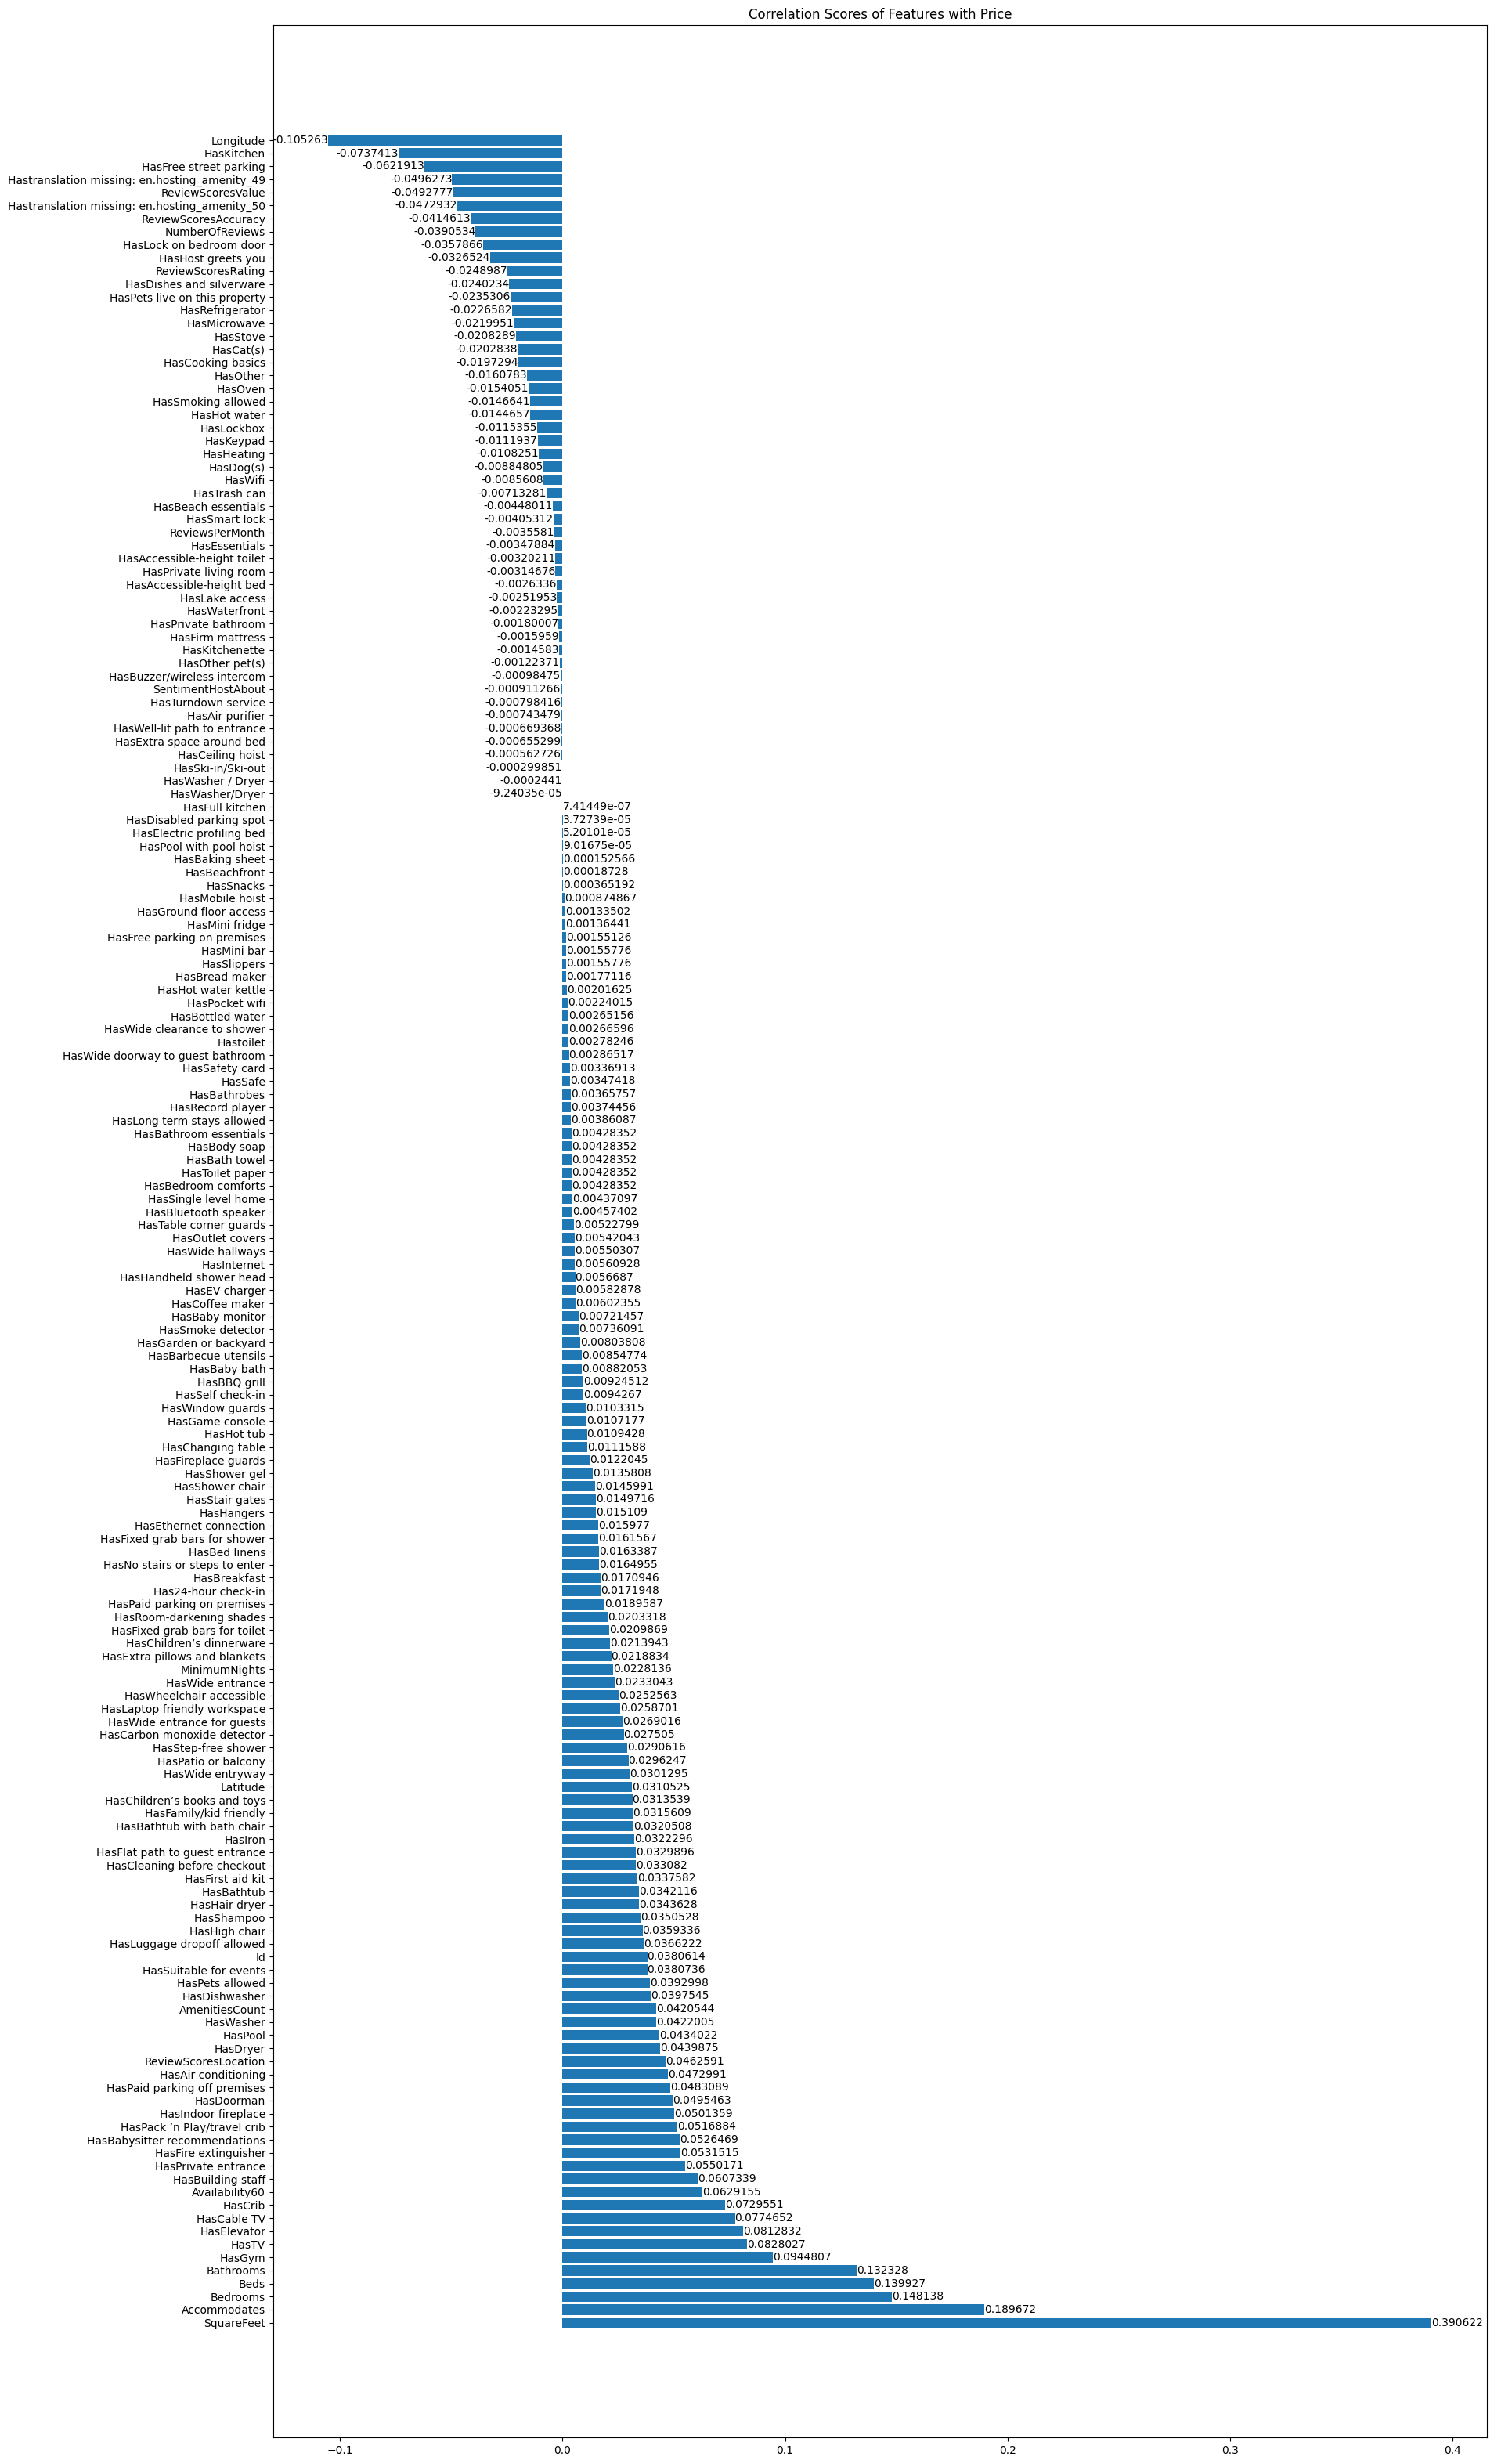

In [21]:
## draw the correlation scores of Price with other features
correlation_scores = correlation_matrix['Price'].sort_values(ascending=False)
## remove the 0 or Nan Values
correlation_scores = correlation_scores[correlation_scores != 0]
correlation_scores = correlation_scores.dropna()
correlation_scores.drop('Price', inplace=True)
## Plot the correlation scores
fig, ax = plt.subplots(figsize=(20, 40))
bars = ax.barh(correlation_scores.index, correlation_scores.values)
ax.bar_label(bars)
plt.title('Correlation Scores of Features with Price')
plt.show()

## Other fixes

In [16]:
df['SentimentHostAbout'] = df['SentimentHostAbout'].astype(str).str.replace('.', ',')
df['ReviewsPerMonth'] = df['ReviewsPerMonth'].astype(str).str.replace('.', ',')
df["ReviewScoresValue"] = df["ReviewScoresValue"].astype(str).str.replace('.', ',')
df["ReviewScoresLocation"] = df["ReviewScoresLocation"].astype(str).str.replace('.', ',')
df["ReviewScoresAccuracy"] = df["ReviewScoresAccuracy"].astype(str).str.replace('.', ',')
df["ReviewScoresRating"] = df["ReviewScoresRating"].astype(str).str.replace('.', ',')
df.drop(['SquareFeet'], axis=1, inplace=True)
df["Beds"] = df["Beds"].astype(str).str.replace('.', ',')
df["Bathrooms"] = df["Bathrooms"].astype(str).str.replace('.', ',')
df["Bedrooms"] = df["Bedrooms"].astype(str).str.replace('.', ',')


In [17]:
df.to_csv('airbnbmark3_processed_latest.csv', index=False, sep=';')